<a href="https://colab.research.google.com/github/nkilaru213/ai-excercises/blob/main/admissions_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Initial dataset size: 129 rows
Missing Admission Time values: 0
Missing Discharge Time values: 0
Missing Death Time values: 89

Admission Type Distribution:
admission_type
EMERGENCY    119
ELECTIVE       8
URGENT         2
Name: count, dtype: int64


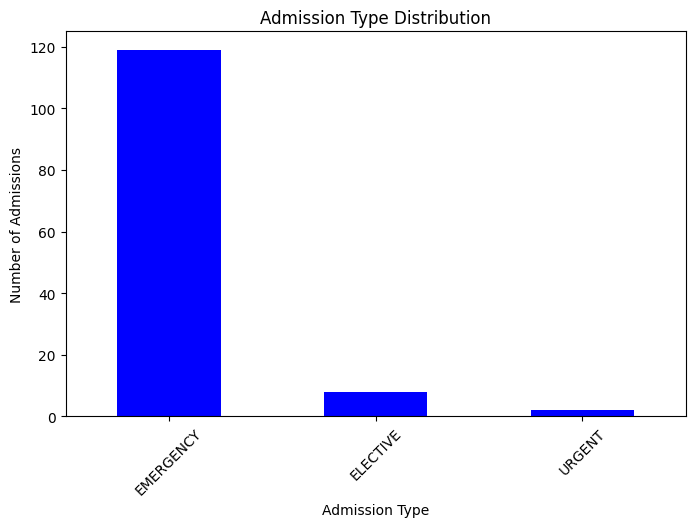


Hospital Expiration Rate:
hospital_expire_flag
0    89
1    40
Name: count, dtype: int64


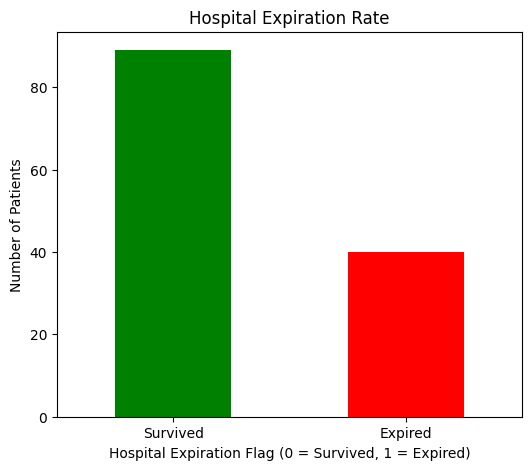


Top Diagnoses:
diagnosis
SEPSIS                              10
PNEUMONIA                            8
SHORTNESS OF BREATH                  4
FEVER                                4
CONGESTIVE HEART FAILURE             3
FAILURE TO THRIVE                    3
RESPIRATORY DISTRESS                 2
LIVER FAILURE                        2
ASTHMA;CHRONIC OBST PULM DISEASE     2
UPPER GI BLEED                       2
Name: count, dtype: int64


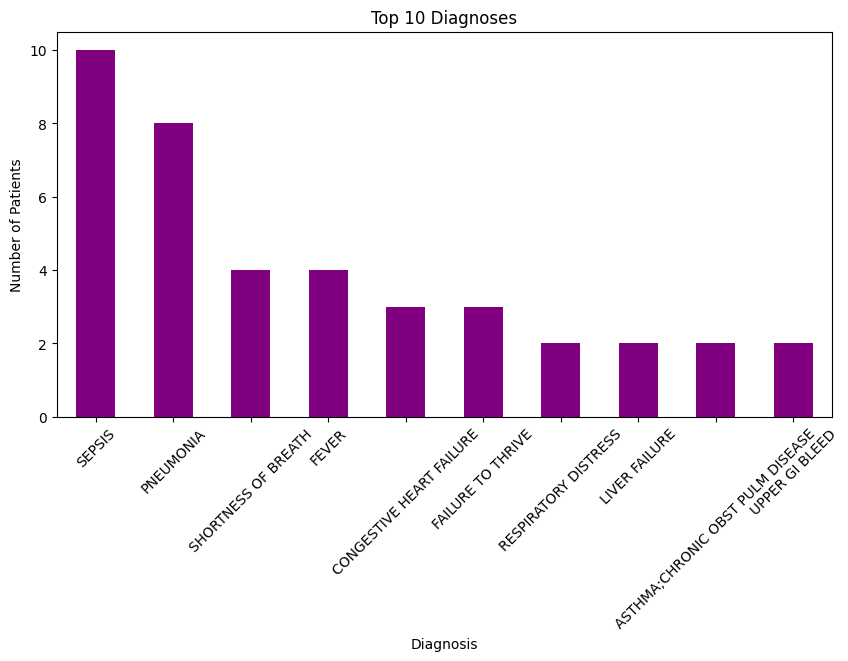


Top Admission Locations:
admission_location
EMERGENCY ROOM ADMIT         81
TRANSFER FROM HOSP/EXTRAM    25
CLINIC REFERRAL/PREMATURE    12
PHYS REFERRAL/NORMAL DELI    10
TRANSFER FROM SKILLED NUR     1
Name: count, dtype: int64


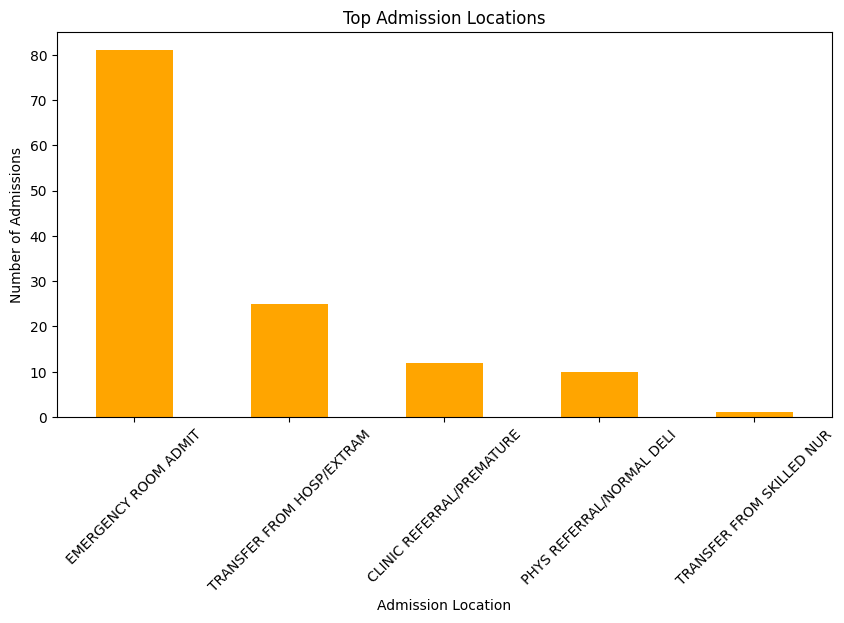

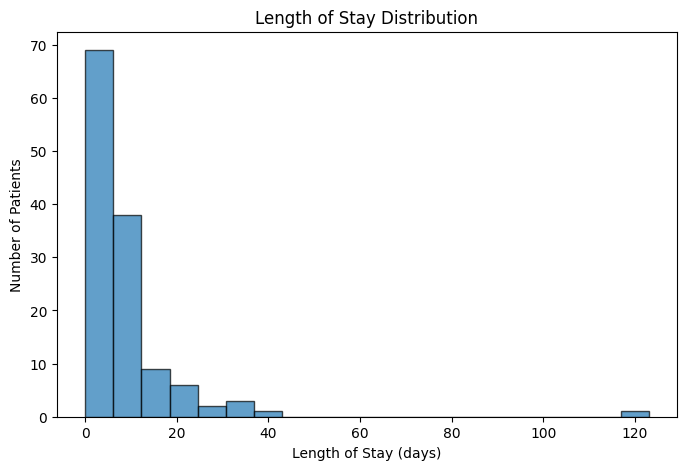


Length of Stay Summary:
count    129.000000
mean       8.775194
std       12.697342
min        0.000000
25%        3.000000
50%        6.000000
75%       10.000000
max      123.000000
Name: length_of_stay, dtype: float64


In [4]:
import pandas as pd
import matplotlib.pyplot as plt


# Loading the data for analysis
df=pd.read_csv('/content/drive/My Drive/Exercises/ADMISSIONS.csv')

# Print initial dataset size
print(f"Initial dataset size: {df.shape[0]} rows")

# Convert date columns to datetime format
df['admittime'] = pd.to_datetime(df['admittime'], errors='coerce')
df['dischtime'] = pd.to_datetime(df['dischtime'], errors='coerce')
df['deathtime'] = pd.to_datetime(df['deathtime'], errors='coerce')

# Print number of missing values in key columns
print(f"Missing Admission Time values: {df['admittime'].isna().sum()}")
print(f"Missing Discharge Time values: {df['dischtime'].isna().sum()}")
print(f"Missing Death Time values: {df['deathtime'].isna().sum()}")

# Calculate Length of Stay
df['length_of_stay'] = (df['dischtime'] - df['admittime']).dt.days

# Admission Type Distribution
admission_type_distribution = df['admission_type'].value_counts()
print("\nAdmission Type Distribution:")
print(admission_type_distribution)
if not admission_type_distribution.empty:
    plt.figure(figsize=(8, 5))
    admission_type_distribution.plot(kind='bar', color='blue')
    plt.xlabel('Admission Type')
    plt.ylabel('Number of Admissions')
    plt.title('Admission Type Distribution')
    plt.xticks(rotation=45)
    plt.show()

# Hospital Expiration Rate
expiration_rate = df['hospital_expire_flag'].value_counts()
print("\nHospital Expiration Rate:")
print(expiration_rate)
if not expiration_rate.empty:
    plt.figure(figsize=(6, 5))
    expiration_rate.plot(kind='bar', color=['green', 'red'])
    plt.xlabel('Hospital Expiration Flag (0 = Survived, 1 = Expired)')
    plt.ylabel('Number of Patients')
    plt.title('Hospital Expiration Rate')
    plt.xticks(ticks=[0, 1], labels=['Survived', 'Expired'], rotation=0)
    plt.show()

# Top Diagnoses
top_diagnoses = df['diagnosis'].value_counts().head(10)
print("\nTop Diagnoses:")
print(top_diagnoses)
if not top_diagnoses.empty:
    plt.figure(figsize=(10, 5))
    top_diagnoses.plot(kind='bar', color='purple')
    plt.xlabel('Diagnosis')
    plt.ylabel('Number of Patients')
    plt.title('Top 10 Diagnoses')
    plt.xticks(rotation=45)
    plt.show()

# Admission Locations
admission_locations = df['admission_location'].value_counts().head(10)
print("\nTop Admission Locations:")
print(admission_locations)
if not admission_locations.empty:
    plt.figure(figsize=(10, 5))
    admission_locations.plot(kind='bar', color='orange')
    plt.xlabel('Admission Location')
    plt.ylabel('Number of Admissions')
    plt.title('Top Admission Locations')
    plt.xticks(rotation=45)
    plt.show()

# Length of Stay Distribution
if not df['length_of_stay'].dropna().empty:
    plt.figure(figsize=(8, 5))
    plt.hist(df['length_of_stay'].dropna(), bins=20, edgecolor='black', alpha=0.7)
    plt.xlabel('Length of Stay (days)')
    plt.ylabel('Number of Patients')
    plt.title('Length of Stay Distribution')
    plt.show()

# Print summary statistics for Length of Stay
print("\nLength of Stay Summary:")
print(df['length_of_stay'].describe())

